In [ ]:
!pip install seaborn
!pip install matplotlib

**Bài tập 1: Visualization (mối quan hệ giữa tuổi và khả năng bị bệnh tim)**

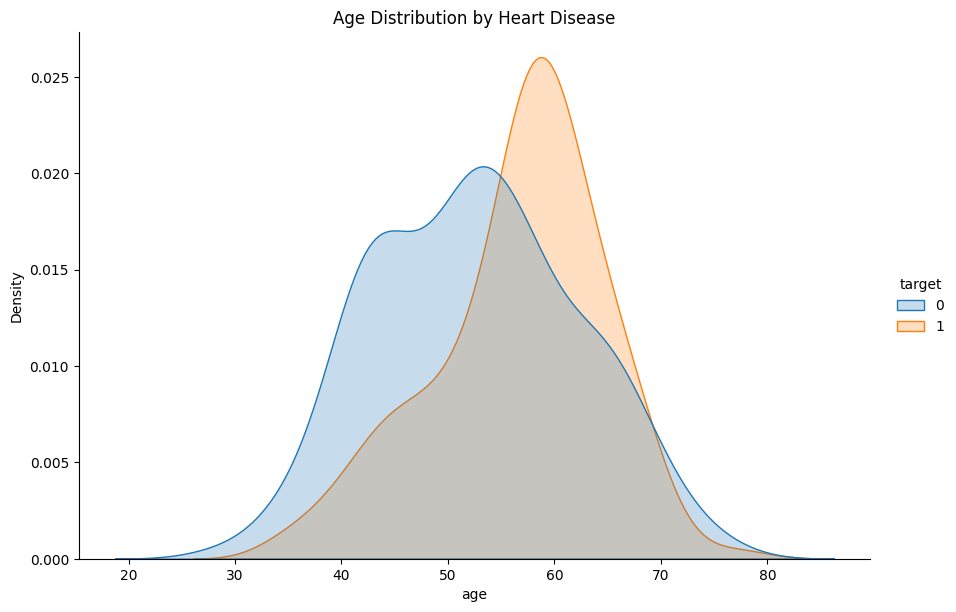

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuyển đổi các giá trị target > 1 thành 1 (bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị thiếu bằng trung bình
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Vẽ biểu đồ phân phối tuổi theo target
sns.displot(df, x="age", hue="target", kind="kde", fill=True, height=6, aspect=1.5)
plt.title('Age Distribution by Heart Disease')
plt.show()


**Bài tập 2: Visualization (mối quan hệ giữa tuổi, giới tính và khả năng bị bệnh tim)**

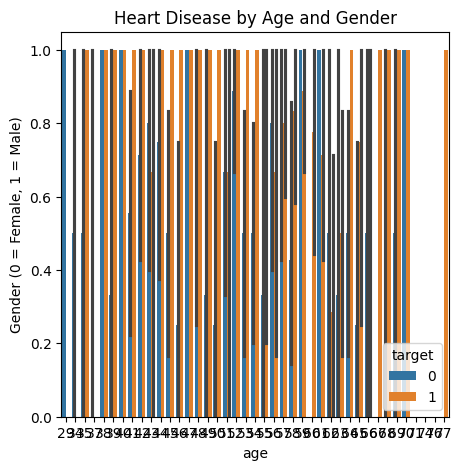

In [5]:
# Vẽ biểu đồ thanh thể hiện mối quan hệ giữa tuổi, giới tính và khả năng bị bệnh tim
plt.figure(figsize=(5, 5))
sns.barplot(x='age', y='sex', hue='target', data=df)
plt.title('Heart Disease by Age and Gender')
plt.ylabel('Gender (0 = Female, 1 = Male)')
plt.show()

**Bài tập 3: Sử dụng KNN để dự đoán bệnh tim**

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Tách dữ liệu thành train và test
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2, metric='minkowski')
knn.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Đánh giá độ chính xác
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Accuracy for training set: {train_accuracy}')
print(f'Accuracy for test set: {test_accuracy}')


Accuracy for training set: 0.756198347107438
Accuracy for test set: 0.6885245901639344


**Bài tập 4: Sử dụng SVM để dự đoán bệnh tim**

In [7]:
from sklearn.svm import SVC

# Khởi tạo mô hình SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

# Đánh giá độ chính xác
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

print(f'Accuracy for training set: {train_accuracy_svm}')
print(f'Accuracy for test set: {test_accuracy_svm}')


Accuracy for training set: 0.6611570247933884
Accuracy for test set: 0.6721311475409836


**Bài tập 5: Sử dụng Naive Bayes để dự đoán bệnh tim**

In [8]:
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb = nb.predict(X_test)

# Đánh giá độ chính xác
train_accuracy_nb = accuracy_score(y_train, y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test, y_pred_test_nb)

print(f'Accuracy for training set: {train_accuracy_nb}')
print(f'Accuracy for test set: {test_accuracy_nb}')


Accuracy for training set: 0.8471074380165289
Accuracy for test set: 0.8360655737704918


**Bài tập 6: Sử dụng Decision Tree để dự đoán bệnh tim**

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình Decision Tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

# Đánh giá độ chính xác
train_accuracy_dt = accuracy_score(y_train, y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test, y_pred_test_dt)

print(f'Accuracy for training set: {train_accuracy_dt}')
print(f'Accuracy for test set: {test_accuracy_dt}')


Accuracy for training set: 1.0
Accuracy for test set: 0.7540983606557377


**Bài tập 7: Sử dụng Random Forest để dự đoán bệnh tim**

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

# Đánh giá độ chính xác
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

print(f'Accuracy for training set: {train_accuracy_rf}')
print(f'Accuracy for test set: {test_accuracy_rf}')


Accuracy for training set: 0.9834710743801653
Accuracy for test set: 0.8032786885245902


**Bài tập 8: Sử dụng AdaBoost để dự đoán bệnh tim**

In [30]:
from sklearn.ensemble import AdaBoostClassifier

# Khởi tạo mô hình AdaBoost với SAMME
# adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME', random_state=42)
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_train_adaboost = adaboost.predict(X_train)
y_pred_test_adaboost = adaboost.predict(X_test)

# Đánh giá độ chính xác
train_accuracy_adaboost = accuracy_score(y_train, y_pred_train_adaboost)
test_accuracy_adaboost = accuracy_score(y_test, y_pred_test_adaboost)

print(f'Accuracy for training set: {train_accuracy_adaboost}')
print(f'Accuracy for test set: {test_accuracy_adaboost}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set: 0.9132231404958677
Accuracy for test set: 0.8360655737704918


**Bài tập 9: Sử dụng GradientBoost để dự đoán bệnh tim**

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Khởi tạo mô hình Gradient Boosting
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

# Đánh giá độ chính xác
train_accuracy_gb = accuracy_score(y_train, y_pred_train_gb)
test_accuracy_gb = accuracy_score(y_test, y_pred_test_gb)

print(f'Accuracy for training set: {train_accuracy_gb}')
print(f'Accuracy for test set: {test_accuracy_gb}')


Accuracy for training set: 0.9958677685950413
Accuracy for test set: 0.8524590163934426


**Bài tập 10: Sử dụng XGBoost để dự đoán bệnh tim**

In [13]:
from xgboost import XGBClassifier

# Khởi tạo mô hình XGBoost
xgb = XGBClassifier(objective="binary:logistic", n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

# Đánh giá độ chính xác
train_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(f'Accuracy for training set: {train_accuracy_xgb}')
print(f'Accuracy for test set: {test_accuracy_xgb}')


Accuracy for training set: 1.0
Accuracy for test set: 0.8688524590163934


**Bài tập 11: Sử dụng kỹ thuật Stacking để dự đoán bệnh tim**

In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import StackingClassifier

# Khởi tạo các mô hình cơ sở với AdaBoost sử dụng SAMME
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgboost', XGBClassifier(random_state=42)),
    ('gradient_boost', GradientBoostingClassifier(random_state=42)),
    ('svm', SVC(kernel='rbf', random_state=42, probability=True)),
    ('adaboost', AdaBoostClassifier(algorithm='SAMME', random_state=42))  # Chỉnh sửa ở đây
]

# Mô hình siêu học (meta learner)
meta_model = LogisticRegression()

# Tạo mô hình Stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Huấn luyện mô hình Stacking
stacking_model.fit(X_train, y_train)

# Dự đoán trên tập train và test
y_pred_train_stacking = stacking_model.predict(X_train)
y_pred_test_stacking = stacking_model.predict(X_test)

# Đánh giá độ chính xác
train_accuracy_stacking = accuracy_score(y_train, y_pred_train_stacking)
test_accuracy_stacking = accuracy_score(y_test, y_pred_test_stacking)

print(f'Accuracy for training set: {train_accuracy_stacking}')
print(f'Accuracy for test set: {test_accuracy_stacking}')


Accuracy for training set: 1.0
Accuracy for test set: 0.8852459016393442
